### Machine Learning Pipeline
The pipeline will involve the following models:
1. Decision Tree
2. Regression
3. Random Forest
4. Gradient-boosted trees
5. Linear Support Vector Machines

### How will this work?
Here's our recipe for success:
- 1st: load the data
- 2nd: split the data (80/20 approach)
- 3rd: get our feature columns and vectorize
- 4th: instantiate Models
- 5th: build and run the pipeline
- 6th: apply metrics (we use accuracy, precision, recall and f1-score)
- 7th: plot the confusion matrix

Documentation: 
- https://spark.apache.org/docs/latest/ml-pipeline.html; 
- https://spark.apache.org/docs/latest/ml-classification-regression.html#decision-tree-classifier
- https://www.v7labs.com/blog/f1-score-guide
- https://developers.google.com/machine-learning/crash-course/classification/precision-and-recall
- https://datascience-enthusiast.com/Python/PySpark_ML_with_Text_part1.html
- https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.mllib.evaluation.MulticlassMetrics.html?highlight=confusion#pyspark.mllib.evaluation.MulticlassMetrics.confusionMatrix
- https://www.sparkitecture.io/machine-learning/model-evaluation
- https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62

Note: we are using an already scaled and normalized dataset, without duplicates, which was processed in the EDA stage of the project.
- Dataset: dfscaled.csv

### Let's start with the imbalanced dataset


In [2]:
# imports and configure spark session

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pyspark.sql.functions as f
from pyspark.sql import SparkSession
from pyspark.ml import Pipeline, PipelineModel
from pyspark.ml.classification import LogisticRegression, DecisionTreeClassifier, RandomForestClassifier, GBTClassifier, LinearSVC, NaiveBayes
from pyspark.ml.feature import StringIndexer, VectorIndexer, IndexToString, VectorAssembler
from pyspark.ml.evaluation import MulticlassClassificationEvaluator, BinaryClassificationEvaluator
from pyspark.mllib.evaluation import MulticlassMetrics 
from pyspark.mllib.linalg import Matrix
import warnings
warnings.filterwarnings('ignore')

spark = SparkSession \
    .builder \
    .master("local") \
    .appName("xpto") \
    .getOrCreate()
sc = spark.sparkContext

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


23/05/01 15:13:44 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
23/05/01 15:13:47 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


In [12]:
# load the data and show first 5 records
data = spark.read.csv('datasets/dfscaled.csv', header=True, inferSchema=True, sep=",")


data.show(5)

+-----+-----------+---------+---------+---------+---------+---------+---------+---------+---------+---------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+-------------+
|Class|Time_Scaled|V1_Scaled|V2_Scaled|V3_Scaled|V4_Scaled|V5_Scaled|V6_Scaled|V7_Scaled|V8_Scaled|V9_Scaled|V10_Scaled|V11_Scaled|V12_Scaled|V13_Scaled|V14_Scaled|V15_Scaled|V16_Scaled|V17_Scaled|V18_Scaled|V19_Scaled|V20_Scaled|V21_Scaled|V22_Scaled|V23_Scaled|V24_Scaled|V25_Scaled|V26_Scaled|V27_Scaled|V28_Scaled|Amount_Scaled|
+-----+-----------+---------+---------+---------+---------+---------+---------+---------+---------+---------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+-------------+
|

In [14]:
# check the spark shape
print(f"Number of columns: {len(data.columns)}")
print(f"Number of Records: {data.count()}")

Number of columns: 31
Number of Records: 283726


In [15]:
# build a data split: 80/20
train, test = data.randomSplit(weights=[0.8, 0.2], seed=42)
print('Train shape: ', (train.count(), len(train.columns)))
print('Test shape: ', (test.count(), len(test.columns)))

Train shape:  (226874, 31)


Test shape:  (56852, 31)


In [16]:
# get feature columns names
feature_columns = [col for col in data.columns if col!= 'Class']
print(feature_columns)
print(len(feature_columns))

['Time_Scaled', 'V1_Scaled', 'V2_Scaled', 'V3_Scaled', 'V4_Scaled', 'V5_Scaled', 'V6_Scaled', 'V7_Scaled', 'V8_Scaled', 'V9_Scaled', 'V10_Scaled', 'V11_Scaled', 'V12_Scaled', 'V13_Scaled', 'V14_Scaled', 'V15_Scaled', 'V16_Scaled', 'V17_Scaled', 'V18_Scaled', 'V19_Scaled', 'V20_Scaled', 'V21_Scaled', 'V22_Scaled', 'V23_Scaled', 'V24_Scaled', 'V25_Scaled', 'V26_Scaled', 'V27_Scaled', 'V28_Scaled', 'Amount_Scaled']
30


In [17]:
# vectorize
vectorizer = VectorAssembler(inputCols=feature_columns, outputCol="features")
train_vec = vectorizer.transform(train)
test_vec = vectorizer.transform(test)

#### Scores on the TRAINING AND TEST SET:

Current model:  Logistic Regression


23/05/01 15:30:54 WARN InstanceBuilder$NativeBLAS: Failed to load implementation from:dev.ludovic.netlib.blas.JNIBLAS
23/05/01 15:30:54 WARN InstanceBuilder$NativeBLAS: Failed to load implementation from:dev.ludovic.netlib.blas.ForeignLinkerBLAS


Accuracy on Train:  0.9983162460220211
Accuracy on Test:  0.9983993527052698


Precision on Train:  0.9983162460220211
Precision on Test:  0.9983993527052698


Recall on Train:  1.0
Recall on Test:  1.0


F1-score on Train:  0.9974750783870849
F1-score on Test:  0.9975996700888774


Confusion Matrix on Train set:


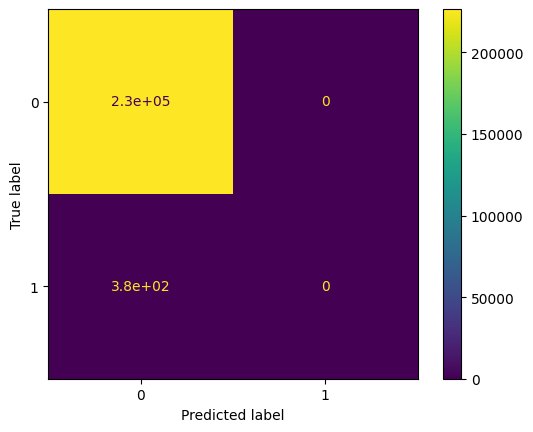

Confusion Matrix on Test set:


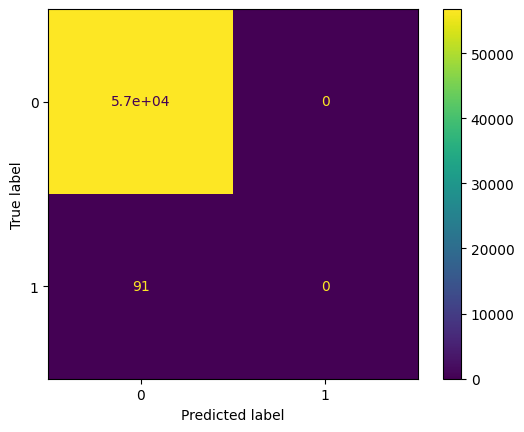

Current model:  Decision Tree


Accuracy on Train:  0.9994005483219761
Accuracy on Test:  0.9991557025258566


Precision on Train:  0.9994836488812392
Precision on Test:  0.9993484424252029


Recall on Train:  0.9999161118273493
Recall on Test:  0.9998062049646764


F1-score on Train:  0.9993565093494554
F1-score on Test:  0.9990854410658073


Confusion Matrix on Train set:


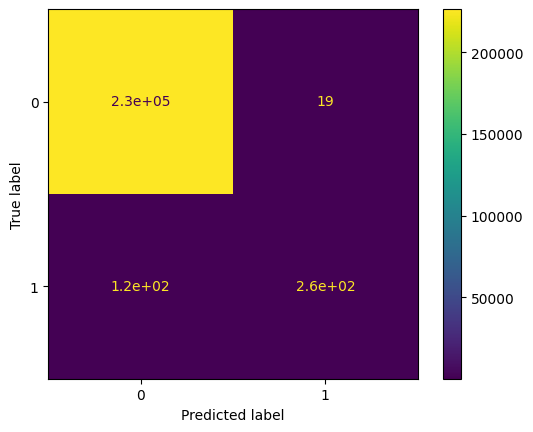

Confusion Matrix on Test set:


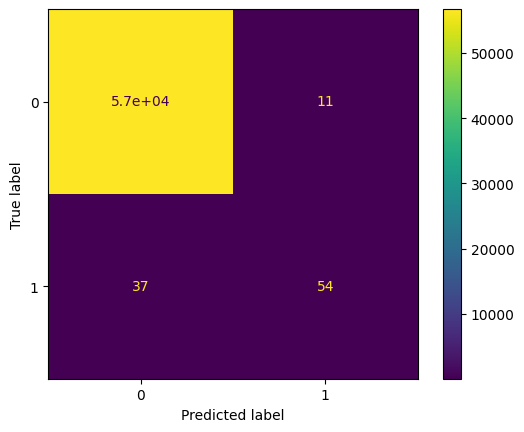

Current model:  Random Forest


Accuracy on Train:  0.9993917328561228
Accuracy on Test:  0.9994723140786603


Precision on Train:  0.999602708644177
Precision on Test:  0.9995949063881502


Recall on Train:  0.9997880719848825
Recall on Test:  0.9998766758866123


F1-score on Train:  0.99937406907168
F1-score on Test:  0.999446920613122


Confusion Matrix on Train set:


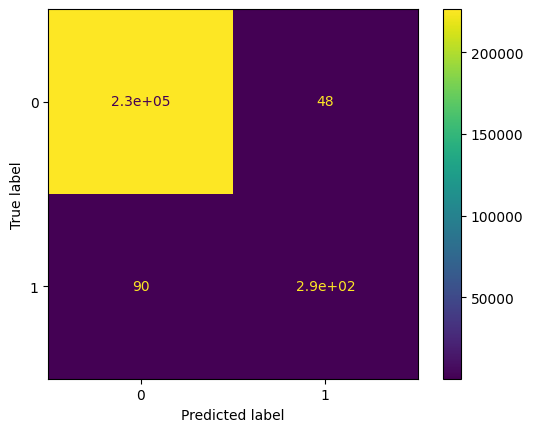

Confusion Matrix on Test set:


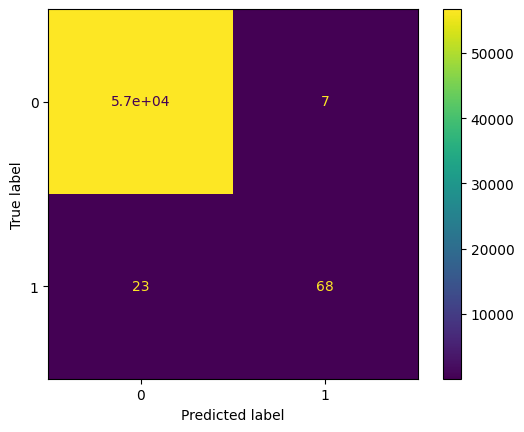

Current model:  Gradient-Boosted Tree


Accuracy on Train:  0.9996165272353817
Accuracy on Test:  0.999401955955815


Precision on Train:  0.9996910106159924
Precision on Test:  0.9995772787318362


Recall on Train:  0.9999249421613126
Recall on Test:  0.9998238226951605


F1-score on Train:  0.9996022570808226
F1-score on Test:  0.9993770743260526


Confusion Matrix on Train set:


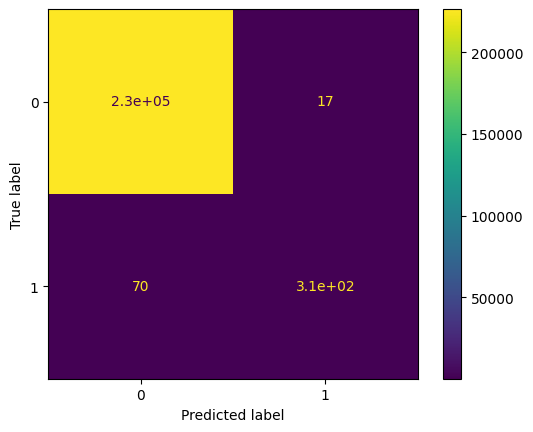

Confusion Matrix on Test set:


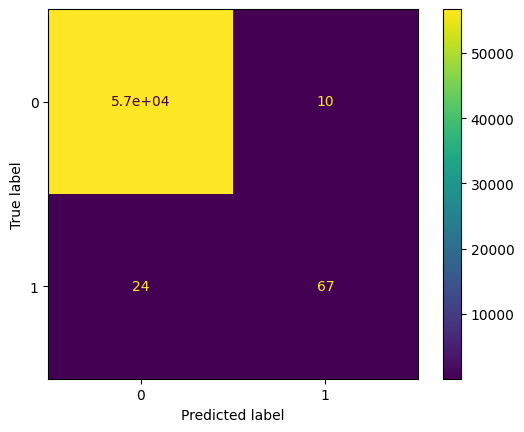

Current model:  Linear Support Vector Machines


Accuracy on Train:  0.9993476555268563
Accuracy on Test:  0.9994899036093717


Precision on Train:  0.9996026911055782
Precision on Test:  0.9996653161881275


Recall on Train:  0.9997439203150663
Recall on Test:  0.9998238226951605


F1-score on Train:  0.9993334196713192
F1-score on Test:  0.9994766554247109


Confusion Matrix on Train set:


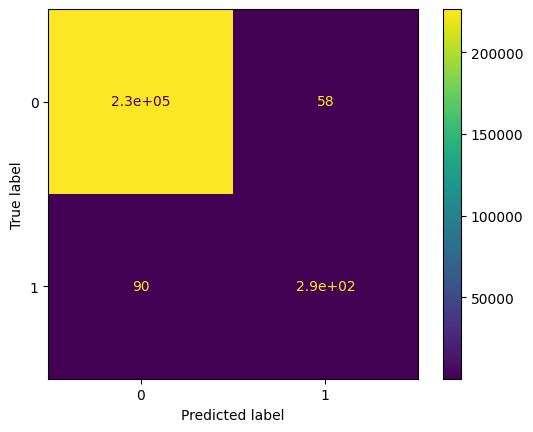

Confusion Matrix on Test set:


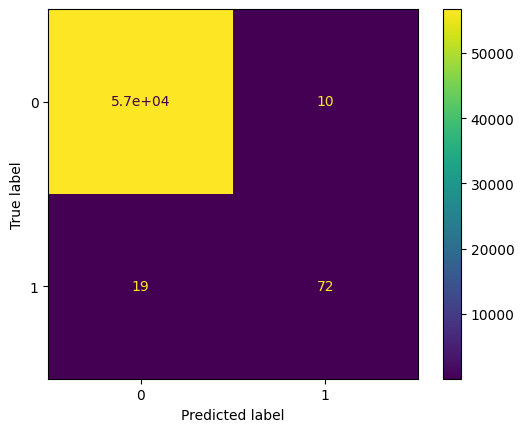

In [18]:
from pyspark.sql.types import StringType, BooleanType, IntegerType, FloatType, DateType, DoubleType
from sklearn.metrics import ConfusionMatrixDisplay
np.set_printoptions(suppress=True)

# instantiate Models

# regression
lr = LogisticRegression(
    featuresCol='features',
    labelCol='Class',
    predictionCol='Class_Prediction',
    maxIter=10,
    regParam=0.3,
    elasticNetParam=0.8
)

# decison tree
dt = DecisionTreeClassifier(featuresCol='features',
    labelCol='Class',
    predictionCol='Class_Prediction'
)

# random forest
rf = RandomForestClassifier(
    featuresCol='features',
    labelCol='Class',
    predictionCol='Class_Prediction'
)

# gradient - boosted tree
gbt = GBTClassifier(
    featuresCol='features',
    labelCol='Class',
    predictionCol='Class_Prediction'
)

# linear support vector machines
lsvc = LinearSVC(
    featuresCol='features',
    labelCol='Class',
    predictionCol='Class_Prediction'
)

# naive bayes
#nb = NaiveBayes(
    #featuresCol='features',
    #labelCol='Class',
    #predictionCol='Class_Prediction'
    #smoothing=1.0, 
    #modelType="multinomial"
#)




# create list of models
list_of_models = [lr, dt, rf, gbt, lsvc]
list_of_model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Gradient-Boosted Tree', 'Linear Support Vector Machines']

# go through list
for model, model_name in zip(list_of_models, list_of_model_names):

    # print current model
    print('Current model: ', model_name)

    # create a pipeline object
    pipeline = Pipeline(stages=[model])

    # fit pipeline
    pipeline_model = pipeline.fit(train_vec)

    # get scores on the training set
    train_pred = pipeline_model.transform(train_vec)

    # get scores on the test set
    test_pred = pipeline_model.transform(test_vec)

    # get accuracy on train and test set
    accuracy_evaluator = MulticlassClassificationEvaluator(predictionCol='Class_Prediction', labelCol='Class', metricName='accuracy')
    accuracy_score_train = accuracy_evaluator.evaluate(train_pred)
    accuracy_score_test = accuracy_evaluator.evaluate(test_pred)
    print('Accuracy on Train: ', accuracy_score_train)
    print('Accuracy on Test: ', accuracy_score_test)

    # get precision on train and test set
    precision_evaluator = MulticlassClassificationEvaluator(predictionCol='Class_Prediction', labelCol='Class', metricName='precisionByLabel')
    precision_score_train = precision_evaluator.evaluate(train_pred)
    precision_score_test = precision_evaluator.evaluate(test_pred)
    print('Precision on Train: ', precision_score_train)
    print('Precision on Test: ', precision_score_test)

    # get recall on train and test set
    recall_evaluator = MulticlassClassificationEvaluator(predictionCol='Class_Prediction', labelCol='Class', metricName='recallByLabel')
    recall_score_train = recall_evaluator.evaluate(train_pred)
    recall_score_test = recall_evaluator.evaluate(test_pred)
    print('Recall on Train: ', recall_score_train)
    print('Recall on Test: ', recall_score_test)

    # get f1-score on train and test set
    f1_evaluator = MulticlassClassificationEvaluator(predictionCol='Class_Prediction', labelCol='Class', metricName='f1')
    f1_score_train = f1_evaluator.evaluate(train_pred)
    f1_score_test = f1_evaluator.evaluate(test_pred)
    print('F1-score on Train: ', f1_score_train)
    print('F1-score on Test: ', f1_score_test)

    # get confusion matrix on train set
    preds_and_labels_train = train_pred.withColumn("Class_Prediction", train_pred["Class_Prediction"].cast(DoubleType())).withColumn("Class", train_pred["Class"].cast(DoubleType()))
    preds_and_labels_train = preds_and_labels_train.select(['Class_Prediction', 'Class'])
    metrics_train = MulticlassMetrics(preds_and_labels_train.rdd)
    cm_arr_train = metrics_train.confusionMatrix().toArray().astype(float)
    cm_disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_arr_train)
    print('Confusion Matrix on Train set:')
    cm_disp_train.plot()
    plt.show()

    # get confusion matrix on test set
    preds_and_labels_test = test_pred.withColumn("Class_Prediction", test_pred["Class_Prediction"].cast(DoubleType())).withColumn("Class", test_pred["Class"].cast(DoubleType()))
    preds_and_labels_test = preds_and_labels_test.select(['Class_Prediction', 'Class'])
    metrics_test = MulticlassMetrics(preds_and_labels_test.rdd)
    cm_arr_test = metrics_test.confusionMatrix().toArray().astype(float)
    cm_disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_arr_test)
    print('Confusion Matrix on Test set:')
    cm_disp_test.plot()
    plt.show()


    

#### Conclusions: Imbalanced dataset
As expected when working with an imbalanced, binary-targeted dataset, the predictions have excellent values for every metric. This happens because, in this particular case, 99% of records have a value of '0 - not fraud', which means that the model is basically training to predict 0s most of the time. Since the train and test scores have similar values, we can infere that overfitting is not occuring.

### Working with the balanced dataset

First we have to balance the data set. Here we use a random undersampling approach

In [19]:
# balancing the dataset

# select fraud and non-fraud transactions and limit non-fraud transactions to the same number as fraud transactions
fraud_data = data.filter(f.col('Class') == 1)
non_fraud_data = data.filter(f.col('Class') == 0).limit(fraud_data.count())

# Combine fraud and non-fraud transactions and shuffle the data
balanced_data = fraud_data.union(non_fraud_data).orderBy(f.rand())

# Show 5 rows of the shuffled, balanced data
balanced_data.show(5)

+-----+-----------+---------+---------+---------+---------+---------+---------+---------+---------+---------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+-------------+
|Class|Time_Scaled|V1_Scaled|V2_Scaled|V3_Scaled|V4_Scaled|V5_Scaled|V6_Scaled|V7_Scaled|V8_Scaled|V9_Scaled|V10_Scaled|V11_Scaled|V12_Scaled|V13_Scaled|V14_Scaled|V15_Scaled|V16_Scaled|V17_Scaled|V18_Scaled|V19_Scaled|V20_Scaled|V21_Scaled|V22_Scaled|V23_Scaled|V24_Scaled|V25_Scaled|V26_Scaled|V27_Scaled|V28_Scaled|Amount_Scaled|
+-----+-----------+---------+---------+---------+---------+---------+---------+---------+---------+---------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+-------------+
|

In [20]:
# build a data split: 80/20
balanced_train, balanced_test = balanced_data.randomSplit(weights=[0.8, 0.2], seed=42)
print('Train shape: ', (balanced_train.count(), len(balanced_train.columns)))
print('Test shape: ', (balanced_test.count(), len(balanced_test.columns)))

Train shape:  (793, 31)


Test shape:  (153, 31)


In [21]:
# get feature columns names
balanced_feature_columns = [col for col in balanced_data.columns if col!= 'Class']
print(balanced_feature_columns)
print(len(balanced_feature_columns))

['Time_Scaled', 'V1_Scaled', 'V2_Scaled', 'V3_Scaled', 'V4_Scaled', 'V5_Scaled', 'V6_Scaled', 'V7_Scaled', 'V8_Scaled', 'V9_Scaled', 'V10_Scaled', 'V11_Scaled', 'V12_Scaled', 'V13_Scaled', 'V14_Scaled', 'V15_Scaled', 'V16_Scaled', 'V17_Scaled', 'V18_Scaled', 'V19_Scaled', 'V20_Scaled', 'V21_Scaled', 'V22_Scaled', 'V23_Scaled', 'V24_Scaled', 'V25_Scaled', 'V26_Scaled', 'V27_Scaled', 'V28_Scaled', 'Amount_Scaled']
30


In [24]:
# vectorize
balanced_vectorizer = VectorAssembler(inputCols=balanced_feature_columns, outputCol="features")
balanced_train_vec = balanced_vectorizer.transform(balanced_train)
balanced_test_vec = balanced_vectorizer.transform(balanced_test)

Current model:  Logistic Regression


Accuracy on Train:  0.8953341740226987
Accuracy on Test:  0.8496732026143791
Precision on Train:  0.8299180327868853
Precision on Test:  0.7472527472527473


Recall on Train:  1.0
Recall on Test:  1.0


F1-score on Train:  0.8939303964362251
F1-score on Test:  0.8487856358476304
Confusion Matrix on Train set:


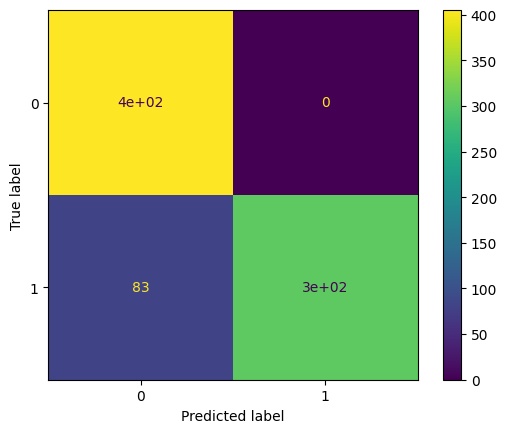

Confusion Matrix on Test set:


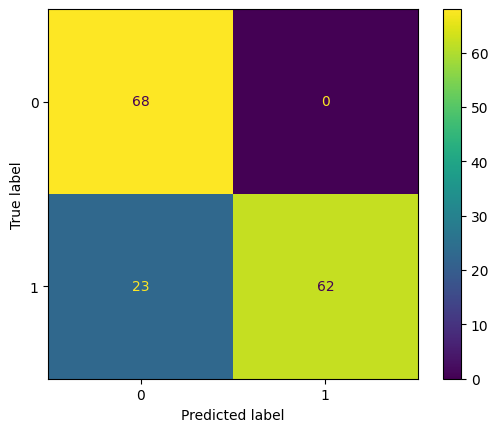

Current model:  Decision Tree
Accuracy on Train:  0.9848675914249685
Accuracy on Test:  0.9477124183006536
Precision on Train:  0.9757869249394673
Precision on Test:  0.9166666666666666
Recall on Train:  0.9950617283950617
Recall on Test:  0.9705882352941176
F1-score on Train:  0.9848627739049198
F1-score on Test:  0.9478294128896538
Confusion Matrix on Train set:


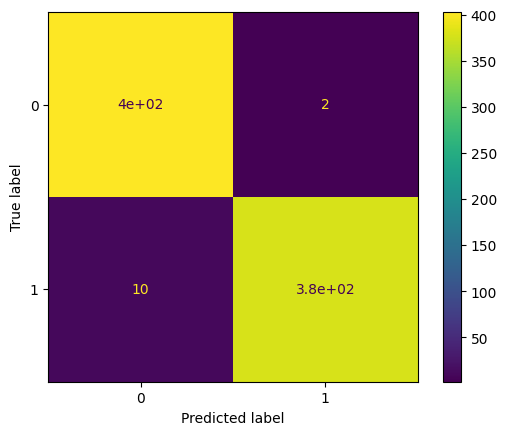

Confusion Matrix on Test set:


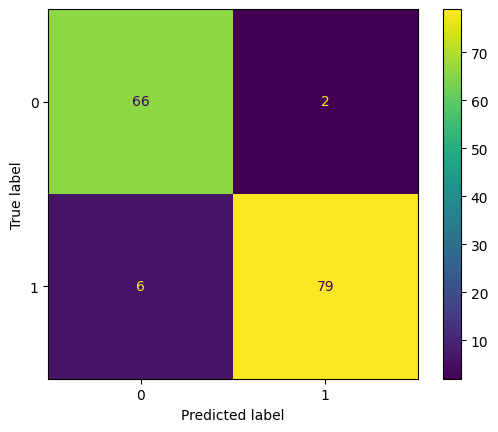

Current model:  Random Forest


Accuracy on Train:  0.9672131147540983
Accuracy on Test:  0.934640522875817


Precision on Train:  0.9437939110070258
Precision on Test:  0.881578947368421
Recall on Train:  0.9950617283950617
Recall on Test:  0.9852941176470589
F1-score on Train:  0.967168271948515
F1-score on Test:  0.9348422496570645
Confusion Matrix on Train set:


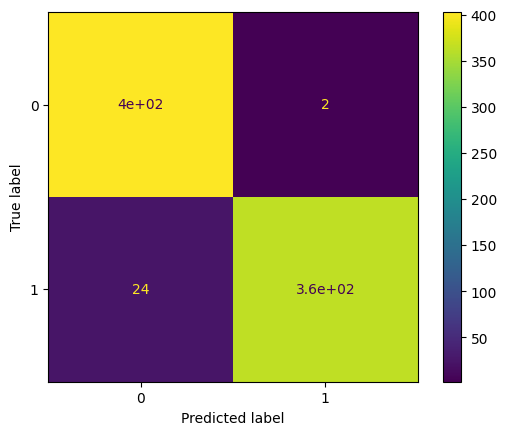

Confusion Matrix on Test set:


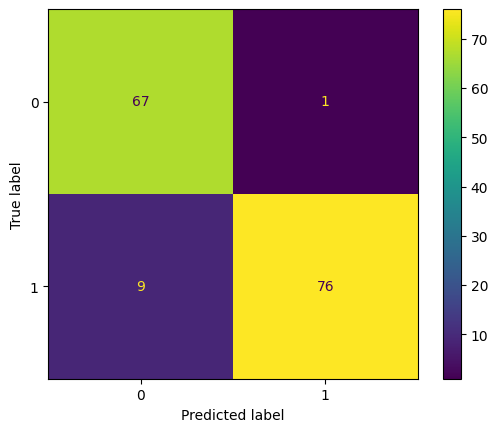

Current model:  Gradient-Boosted Tree
Accuracy on Train:  0.9974779319041615
Accuracy on Test:  0.954248366013072


Precision on Train:  0.995085995085995
Precision on Test:  0.9178082191780822
Recall on Train:  1.0
Recall on Test:  0.9852941176470589


F1-score on Train:  0.9974777794134415
F1-score on Test:  0.9543663586216777
Confusion Matrix on Train set:


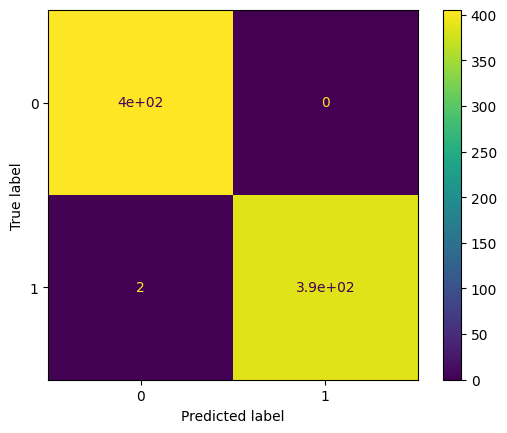

Confusion Matrix on Test set:


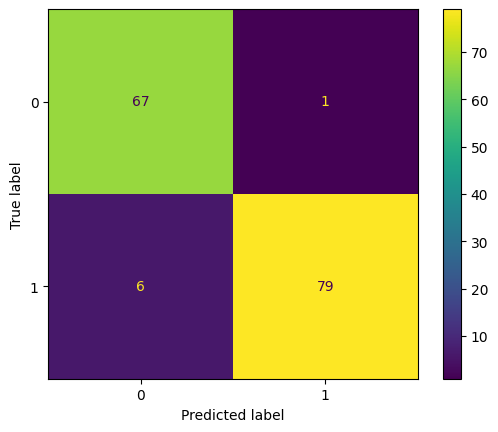

Current model:  Linear Support Vector Machines


Accuracy on Train:  0.9735182849936949
Accuracy on Test:  0.9477124183006536


Precision on Train:  0.9571428571428572
Precision on Test:  0.9054054054054054


Recall on Train:  0.9925925925925926
Recall on Test:  0.9852941176470589
F1-score on Train:  0.9734980385504932
F1-score on Test:  0.947860605366617
Confusion Matrix on Train set:


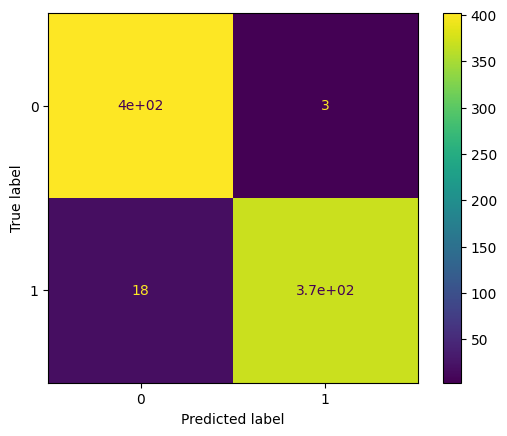

Confusion Matrix on Test set:


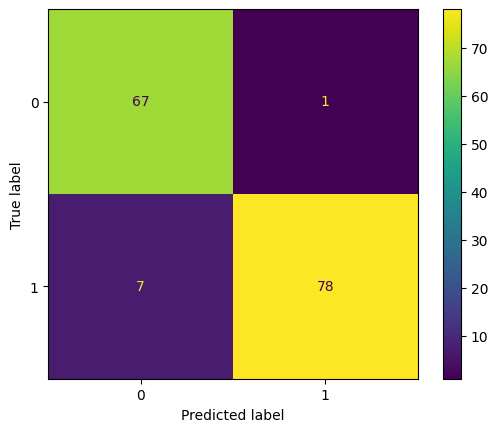

In [25]:
# instantiate Models

# regression
balanced_lr = LogisticRegression(
    featuresCol='features',
    labelCol='Class',
    predictionCol='Class_Prediction',
    maxIter=10,
    regParam=0.3,
    elasticNetParam=0.8
)

# decison tree
balanced_dt = DecisionTreeClassifier(featuresCol='features',
    labelCol='Class',
    predictionCol='Class_Prediction'
)

# random forest
balanced_rf = RandomForestClassifier(
    featuresCol='features',
    labelCol='Class',
    predictionCol='Class_Prediction'
)

# gradient - boosted tree
balanced_gbt = GBTClassifier(
    featuresCol='features',
    labelCol='Class',
    predictionCol='Class_Prediction'
)

# linear support vector machines
balanced_lsvc = LinearSVC(
    featuresCol='features',
    labelCol='Class',
    predictionCol='Class_Prediction'
)

# naive bayes
#balanced_nb = NaiveBayes(
    #featuresCol='features',
    #labelCol='Class',
    #predictionCol='Class_Prediction'
    #smoothing=1.0, 
    #modelType="multinomial"
#)




# create list of models
balanced_list_of_models = [balanced_lr, balanced_dt, balanced_rf, balanced_gbt, balanced_lsvc]
balanced_list_of_model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Gradient-Boosted Tree', 'Linear Support Vector Machines']

# go through list
for balanced_model, balanced_model_name in zip(balanced_list_of_models, balanced_list_of_model_names):

    # print current model
    print('Current model: ', balanced_model_name)

    # create a pipeline object
    balanced_pipeline = Pipeline(stages=[balanced_model])

    # fit pipeline
    balanced_pipeline_model = balanced_pipeline.fit(balanced_train_vec)

    # get scores on the training set
    balanced_train_pred = balanced_pipeline_model.transform(balanced_train_vec)

    # get scores on the test set
    balanced_test_pred = balanced_pipeline_model.transform(balanced_test_vec)

    # get accuracy on train and test set
    balanced_accuracy_evaluator = MulticlassClassificationEvaluator(predictionCol='Class_Prediction', labelCol='Class', metricName='accuracy')
    balanced_accuracy_score_train = balanced_accuracy_evaluator.evaluate(balanced_train_pred)
    balanced_accuracy_score_test = balanced_accuracy_evaluator.evaluate(balanced_test_pred)
    print('Accuracy on Train: ', balanced_accuracy_score_train)
    print('Accuracy on Test: ', balanced_accuracy_score_test)

    # get precision on train and test set
    balanced_precision_evaluator = MulticlassClassificationEvaluator(predictionCol='Class_Prediction', labelCol='Class', metricName='precisionByLabel')
    balanced_precision_score_train = balanced_precision_evaluator.evaluate(balanced_train_pred)
    balanced_precision_score_test = balanced_precision_evaluator.evaluate(balanced_test_pred)
    print('Precision on Train: ', balanced_precision_score_train)
    print('Precision on Test: ', balanced_precision_score_test)

    # get recall on train and test set
    balanced_recall_evaluator = MulticlassClassificationEvaluator(predictionCol='Class_Prediction', labelCol='Class', metricName='recallByLabel')
    balanced_recall_score_train = balanced_recall_evaluator.evaluate(balanced_train_pred)
    balanced_recall_score_test = balanced_recall_evaluator.evaluate(balanced_test_pred)
    print('Recall on Train: ', balanced_recall_score_train)
    print('Recall on Test: ', balanced_recall_score_test)

    # get f1-score on train and test set
    balanced_f1_evaluator = MulticlassClassificationEvaluator(predictionCol='Class_Prediction', labelCol='Class', metricName='f1')
    balanced_f1_score_train = balanced_f1_evaluator.evaluate(balanced_train_pred)
    balanced_f1_score_test = balanced_f1_evaluator.evaluate(balanced_test_pred)
    print('F1-score on Train: ', balanced_f1_score_train)
    print('F1-score on Test: ', balanced_f1_score_test)

    # get confusion matrix on train set
    balanced_preds_and_labels_train = balanced_train_pred.withColumn("Class_Prediction", balanced_train_pred["Class_Prediction"].cast(DoubleType())).withColumn("Class", balanced_train_pred["Class"].cast(DoubleType()))
    balanced_preds_and_labels_train = balanced_preds_and_labels_train.select(['Class_Prediction', 'Class'])
    balanced_metrics_train = MulticlassMetrics(balanced_preds_and_labels_train.rdd)
    balanced_cm_arr_train = balanced_metrics_train.confusionMatrix().toArray().astype(float)
    balanced_cm_disp_train = ConfusionMatrixDisplay(confusion_matrix=balanced_cm_arr_train)
    print('Confusion Matrix on Train set:')
    balanced_cm_disp_train.plot()
    plt.show()

    # get confusion matrix on test set
    balanced_preds_and_labels_test = balanced_test_pred.withColumn("Class_Prediction", balanced_test_pred["Class_Prediction"].cast(DoubleType())).withColumn("Class", balanced_test_pred["Class"].cast(DoubleType()))
    balanced_preds_and_labels_test = balanced_preds_and_labels_test.select(['Class_Prediction', 'Class'])
    balanced_metrics_test = MulticlassMetrics(balanced_preds_and_labels_test.rdd)
    balanced_cm_arr_test = balanced_metrics_test.confusionMatrix().toArray().astype(float)
    balanced_cm_disp_test = ConfusionMatrixDisplay(confusion_matrix=balanced_cm_arr_test)
    print('Confusion Matrix on Test set:')
    balanced_cm_disp_test.plot()
    plt.show()


#### Conclusions: Balanced dataset
We can see that, in terms of performance, Logistic Regression was the model that obtained the worst results, having 0.74 as the value for precision on the test set. The remaining models obtained better results, with values ranging from 0.88 to 1. Overall, the metrics' values were lower when applying the ML pipeline on the balanced dataset.